In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#importing data from a remote link
url='http://bit.ly/w-data'
data=pd.read_csv(url)
print('data immported successfully')
data.head(10)

data immported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


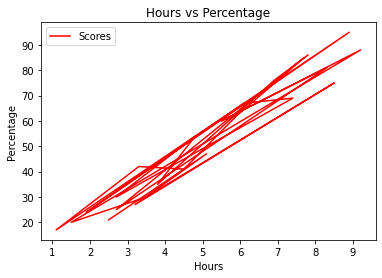

In [3]:
data.plot(x='Hours', y='Scores', style='-', c='red')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

In [4]:
#preparing the data
#divide data into inputs and outputs
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [5]:
x=data[['Hours']].values
y=data[['Scores']].values

In [6]:
x,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([[21],
        [47],
        [27],
        [75],
        [30],
        [20],
        [88],
        [60],
        [81],
        [25],
        [85],
        [62],
        [41],
        [42],
        [17],
        [95],
        [30],
        [24],
        [67],
        [69],
        [30],
        [54],
        [35],
        [76],
        [86]], dtype=int64))

In [7]:
#dividing dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
#training the algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print('Training Complete')

Training Complete


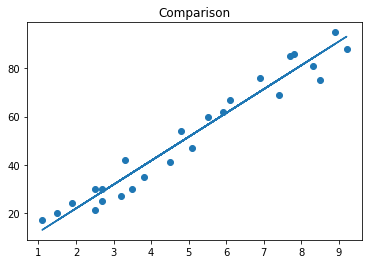

In [9]:
#plotting the regression line
line = regressor.coef_*x+regressor.intercept_

#plotting for test data
plt.scatter(x, y)
plt.plot(x, line)
plt.title('Comparison')
plt.show()

In [10]:
#making predictions
print(x_test) #testing data - in hours
y_pred = regressor.predict(x_test)# predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [11]:
#comparing actual vs predicted
df = pd.DataFrame({'Actual': list(y_test), 'Predicted': list(y_pred)})
df

,Actual,Predicted
0,[20],[16.884144762398037]
1,[27],[33.73226077948984]
2,[69],[75.35701799818723]
3,[30],[26.794801243040276]
4,[62],[60.491033277223885]


In [12]:
score_pred= np.array([9.25])
score_pred= score_pred.reshape(-1,1)
predict= regressor.predict(score_pred)
print('No. of hours = {}'.format(9.25))
print('predicted score = {}'.format(predict[0]))

No. of hours = 9.25
predicted score = [93.69173249]


In [13]:
#evaluating model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


In [15]:
data.to_csv('dataset.csv',index = False)

In [17]:
df.to_csv('Output_predicted_marks.csv',index = False)